In [13]:
from keras.datasets import reuters
(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000)

In [14]:
len(train_data)

8982

In [15]:
len(test_data)

2246

In [16]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [17]:
word_index=reuters.get_word_index()
reverse_word_index=dict([(value,key) for (key,value) in word_index.items()])
decoded_newswire=' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

In [18]:
train_labels[0]

3

In [33]:
import numpy as np 
def vectorize_sequences(sequences,dimension=10000):
    results=np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence]=1. 
    return results
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [39]:
def to_one_hot(labels,dimension=46):
    results=np.zeros((len(labels),dimension))
    for i,label in enumerate(labels):
        results[i,label]=1. 
    return results
one_hot_train_labels=to_one_hot(train_labels)
one_hot_test_labels=to_one_hot(test_labels)

In [40]:
from keras import models
from keras import layers
model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

In [41]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])


In [42]:
x_val=x_train[:1000]
partial_x_train=x_train[1000:]
y_val=one_hot_train_labels[:1000]
partial_y_train=one_hot_train_labels[1000:]

In [43]:
history=model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 1s 35ms/step - loss: 2.5326 - accuracy: 0.5058 - val_loss: 1.6905 - val_accuracy: 0.6470
Epoch 2/20
16/16 [==============================] - 0s 22ms/step - loss: 1.4027 - accuracy: 0.7085 - val_loss: 1.3129 - val_accuracy: 0.7150
Epoch 3/20
16/16 [==============================] - 0s 21ms/step - loss: 1.0545 - accuracy: 0.7735 - val_loss: 1.1492 - val_accuracy: 0.7640
Epoch 4/20
16/16 [==============================] - 0s 22ms/step - loss: 0.8304 - accuracy: 0.8232 - val_loss: 1.0632 - val_accuracy: 0.7770
Epoch 5/20
16/16 [==============================] - 0s 21ms/step - loss: 0.6631 - accuracy: 0.8614 - val_loss: 0.9847 - val_accuracy: 0.8030
Epoch 6/20
16/16 [==============================] - 0s 21ms/step - loss: 0.5293 - accuracy: 0.8891 - val_loss: 0.9330 - val_accuracy: 0.8050
Epoch 7/20
16/16 [==============================] - 0s 22ms/step - loss: 0.4219 - accuracy: 0.9126 - val_loss: 0.9397 - val_accuracy: 0.7950
Epoch 8/20
16

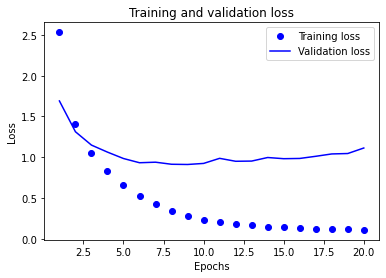

In [44]:
import matplotlib.pyplot as plt 
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

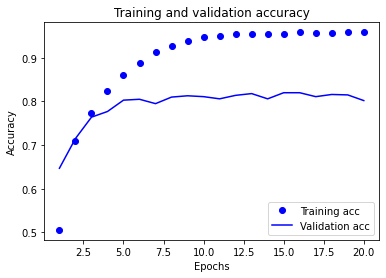

In [47]:
plt.clf()
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [54]:
model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(partial_x_train,partial_y_train,epochs=9,batch_size=512,validation_data=(x_val,y_val))
results=model.evaluate(x_test,one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 33ms/step - loss: 2.5818 - accuracy: 0.5209 - val_loss: 1.7134 - val_accuracy: 0.6360
Epoch 2/9
16/16 [==============================] - 0s 22ms/step - loss: 1.4068 - accuracy: 0.7048 - val_loss: 1.2989 - val_accuracy: 0.7110
Epoch 3/9
16/16 [==============================] - 0s 21ms/step - loss: 1.0473 - accuracy: 0.7739 - val_loss: 1.1258 - val_accuracy: 0.7450
Epoch 4/9
16/16 [==============================] - 0s 22ms/step - loss: 0.8239 - accuracy: 0.8212 - val_loss: 1.0205 - val_accuracy: 0.7930
Epoch 5/9
16/16 [==============================] - 0s 22ms/step - loss: 0.6580 - accuracy: 0.8631 - val_loss: 0.9568 - val_accuracy: 0.7980
Epoch 6/9
16/16 [==============================] - 0s 22ms/step - loss: 0.5239 - accuracy: 0.8893 - val_loss: 0.9276 - val_accuracy: 0.7970
Epoch 7/9
16/16 [==============================] - 0s 22ms/step - loss: 0.4214 - accuracy: 0.9095 - val_loss: 0.9036 - val_accuracy: 0.8160
Epoch 8/9
16/16 [===

In [55]:
results

[0.9757911562919617, 0.7911843061447144]

In [56]:
import copy
test_labels_copy =copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array=np.array((test_labels)==np.array(test_labels_copy))
float(np.sum(hits_array))/len(test_labels)

0.18967052537845058

In [61]:
predictions=model.predict(x_test)
predictions[0].shape

(46,)

In [62]:
np.sum(predictions[0])

1.0

In [66]:
np.argmax(predictions[0])

3

In [67]:
y_train=np.array(train_labels)
y_test=np.array(test_labels)
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossenropy',metrics=['acc'])


In [68]:
model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(4,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=128,validation_data=(x_val,y_val))

Epoch 1/20
63/63 [==============================] - 1s 12ms/step - loss: 2.6956 - accuracy: 0.4655 - val_loss: 1.9369 - val_accuracy: 0.5620
Epoch 2/20
63/63 [==============================] - 1s 10ms/step - loss: 1.6377 - accuracy: 0.6159 - val_loss: 1.5560 - val_accuracy: 0.6160
Epoch 3/20
63/63 [==============================] - 1s 11ms/step - loss: 1.3349 - accuracy: 0.6813 - val_loss: 1.4336 - val_accuracy: 0.6700
Epoch 4/20
63/63 [==============================] - 1s 11ms/step - loss: 1.1671 - accuracy: 0.7228 - val_loss: 1.3939 - val_accuracy: 0.6630
Epoch 5/20
63/63 [==============================] - 1s 10ms/step - loss: 1.0419 - accuracy: 0.7422 - val_loss: 1.3496 - val_accuracy: 0.6810
Epoch 6/20
63/63 [==============================] - 1s 10ms/step - loss: 0.9396 - accuracy: 0.7623 - val_loss: 1.3361 - val_accuracy: 0.6940
Epoch 7/20
63/63 [==============================] - 1s 11ms/step - loss: 0.8436 - accuracy: 0.7973 - val_loss: 1.3418 - val_accuracy: 0.7080
Epoch 8/20
63